# Intor

the package cames with an api and some scripts

In [57]:
import argparse

In [58]:
parser = argparse.ArgumentParser()
parser.add_argument('--foo', help='foo help')
args = parser.parse_args()

usage: ipykernel_launcher.py [-h] [--foo FOO]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/grad/htelg/.local/share/jupyter/runtime/kernel-51c29ccc-3ef1-4033-bcb3-5b67c6b86a14.json


SystemExit: 2

/mnt/telg/programs/anaconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [59]:
args

NameError: name 'args' is not defined

# the sites

In [69]:
from atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad import surfrad
import hrrr_scraper.hrrr_lab as hrrr_lab
import os
os.getpid()

25253

In [107]:
reload(hrrr_lab)

<module 'hrrr_scraper.hrrr_lab' from '/mnt/telg/prog/hrrr_sraper/hrrr_scraper/hrrr_lab.py'>

In [79]:
p2f = pl.Path('ncep_hrrr_3d.2133506000000.grib2')

In [80]:
%%time
hrrinst = hrrr_lab.open_grib_file(p2f)

CPU times: user 1min 22s, sys: 15.7 s, total: 1min 37s
Wall time: 1min 37s


In [81]:
hrrinst.ds

<xarray.Dataset>
Dimensions:                                        (x: 1059, y: 1799, level: 50)
Coordinates:
    latitude                                       (x, y) float32 21.14 ... 4...
    longitude                                      (x, y) float32 -122.7 ... ...
  * level                                          (level) int64 1 2 3 ... 49 50
Dimensions without coordinates: x, y
Data variables: (12/41)
    aerosol_mass_density_vp                        (level, x, y) float32 0.13...
    specific_humidity_vp                           (level, x, y) float32 0.01...
    fraction_of_cloud_cover_vp                     (level, x, y) float32 0.0 ...
    level_height_geo_potential_vp                  (level, x, y) float32 10.7...
    temperature_vp                                 (level, x, y) float32 294....
    pressure_vp                                    (level, x, y) float32 1.01...
    ...                                             ...
    precipitable_water_column                      (x, y) float32 17.75 ... 5...
    total_cloud_cover                              (x, y) float32 38.0 ... 87.0
    aerosol_optical_depth                          (x, y) float32 0.0 ... 0.0
    cloud_base_gph                                 (x, y) float32 3.262e+03 ....
    cloud_top_gph                                  (x, y) float32 nan ... 2.2...
    composite_reflectivity                         (x, y) float32 -10.0 ... -...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [84]:
sitedict = {'name': 'test', 'abb': 'tst', 'lat': 40.12498, 'lon': -105.2368}

In [85]:
sitelist = [{'name': 'test', 'abb': 'tst', 'lat': 40.12498, 'lon': -105.2368}, {'name': 'test2', 'abb': 'tsz', 'lat': 41.12498, 'lon': -115.2368}]

In [109]:
#%%debug -b /mnt/telg/prog/hrrr_sraper/hrrr_scraper/hrrr_lab.py:583
hrrr_proj = hrrinst.project2sites(sitelist)

In [110]:
hrrr_proj.ds

<xarray.Dataset>
Dimensions:                                        (site: 2, altitude: 61)
Coordinates:
  * site                                           (site) <U3 'tst' 'tsz'
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (site) float32 0.05 0.218
    downward_long_wave_radiation_flux_surface      (site) float32 259.7 238.6
    upward_long_wave_radiation_flux_surface        (site) float32 314.4 271.4
    downward_short_wave_radiation_flux_surface     (site) float32 0.0 0.0
    uward_short_wave_radiation_flux_surface        (site) float32 0.0 0.0
    orography                                      (site) float32 1.652e+03 1...
    ...                                             ...
    vertical_velocity_vp                           (site, altitude) float32 n...
    turbulent_kinetic_energy_vp                    (site, altitude) float32 n...
    cloud_mixing_ratio_vp                          (site, altitude) float32 n...
    ice_water_mixing_ratio_vp                      (site, altitude) float32 n...
    rain_mixing_ratio_vp                           (site, altitude) float32 n...
    snow_mixing_ratio_vp                           (site, altitude) float32 n...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [111]:
hrrr_proj.save('test.nc')

1

In [114]:
dst = xr.open_dataset('testme.nc')

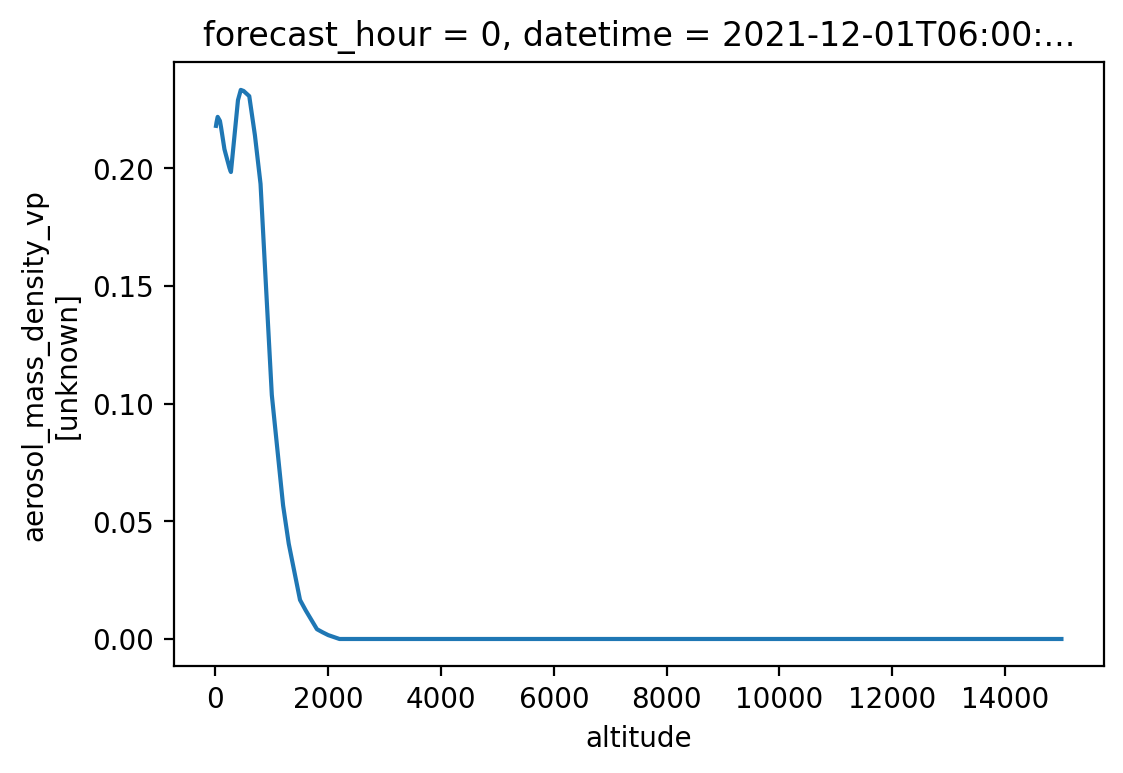

In [119]:
dst.aerosol_mass_density_vp.sel(site = 'tsz').plot()

In [118]:
dst

<xarray.Dataset>
Dimensions:                                        (forecast_hour: 1, datetime: 1, site: 2, altitude: 61)
Coordinates:
  * forecast_hour                                  (forecast_hour) int8 0
  * datetime                                       (datetime) datetime64[ns] ...
  * site                                           (site) object 'tst' 'tsz'
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 ...
    downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 ...
    upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    downward_short_wave_radiation_flux_surface     (forecast_hour, datetime, site) float32 ...
    uward_short_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    orography                                      (forecast_hour, datetime, site) float32 ...
    ...                                             ...
    vertical_velocity_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    turbulent_kinetic_energy_vp                    (forecast_hour, datetime, site, altitude) float32 ...
    cloud_mixing_ratio_vp                          (forecast_hour, datetime, site, altitude) float32 ...
    ice_water_mixing_ratio_vp                      (forecast_hour, datetime, site, altitude) float32 ...
    rain_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    snow_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...
Attributes:
    forecast_time:   00
    cycle_datetime:  2021-12-01 06:00:00

In [108]:
hrrinst = hrrr_lab.HrrrWrfNat(hrrinst.ds) 

In [ ]:
hrrr_proj.save(

In [55]:
hrrr_proj.ds

<xarray.Dataset>
Dimensions:                                        (site: 1, altitude: 61)
Coordinates:
  * site                                           (site) <U3 'tst'
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (site) float32 0.05
    downward_long_wave_radiation_flux_surface      (site) float32 259.7
    upward_long_wave_radiation_flux_surface        (site) float32 314.4
    downward_short_wave_radiation_flux_surface     (site) float32 0.0
    uward_short_wave_radiation_flux_surface        (site) float32 0.0
    orography                                      (site) float32 1.652e+03
    ...                                             ...
    vertical_velocity_vp                           (altitude) float32 nan ......
    turbulent_kinetic_energy_vp                    (altitude) float32 nan ......
    cloud_mixing_ratio_vp                          (altitude) float32 nan ......
    ice_water_mixing_ratio_vp                      (altitude) float32 nan ......
    rain_mixing_ratio_vp                           (altitude) float32 nan ......
    snow_mixing_ratio_vp                           (altitude) float32 nan ......

In [42]:
hrrr_proj2 = hrrinst2.project2sites(sites)

In [11]:
hrrr_proj.ds

<xarray.Dataset>
Dimensions:                                        (site: 7, altitude: 61)
Coordinates:
  * site                                           (site) <U3 'BND' ... 'PSU'
  * altitude                                       (altitude) float64 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (site) float32 0.076 ... 0...
    downward_long_wave_radiation_flux_surface      (site) float32 303.3 ... 2...
    upward_long_wave_radiation_flux_surface        (site) float32 292.4 ... 2...
    downward_short_wave_radiation_flux_surface     (site) float32 0.0 ... 0.0
    uward_short_wave_radiation_flux_surface        (site) float32 0.0 ... 0.0
    orography                                      (site) float32 211.0 ... 3...
    ...                                             ...
    vertical_velocity_vp                           (site, altitude) float32 -...
    turbulent_kinetic_energy_vp                    (site, altitude) float32 0...
    cloud_mixing_ratio_vp                          (site, altitude) float32 0...
    ice_water_mixing_ratio_vp                      (site, altitude) float32 0...
    rain_mixing_ratio_vp                           (site, altitude) float32 0...
    snow_mixing_ratio_vp                           (site, altitude) float32 0...

# OLD

In [ ]:
pp = hrrr_lab.ProjectorProject(sites,
                               path2raw='/mnt/telg/tmp/hrrr_tmp/',
                               path2projected_individual='/mnt/telg/tmp/hrrr_tmp_inter/',
                               path2projected_final='/mnt/telg/projects/smoke_at_gml_sites/data/wrfnat/',
                               ftp_server='ftp.ncep.noaa.gov',
                               ftp_path2files='/pub/data/nccf/com/hrrr/prod',
                               max_forcast_interval=18,
                            )

# Implentation of AWS

# API

# Run the current version

In [2]:
from hrrr_scraper import scrapelab
from hrrr_scraper import hrrr_lab
from atmPy.data_archives.NOAA_ESRL_GMD_GRAD.surfrad import surfrad
import atmPy.data_archives.noaa_gml
from atmPy.general import measurement_site as ms
from mpl_toolkits.basemap import Basemap
import os
os.getpid()

8008

## loade sites

### surfrad sites

In [83]:
sites = surfrad.network

### gml_sites

In [84]:
gml_sites = atmPy.data_archives.noaa_gml.get_all_sites()
# extra from Betsy
gml_sites.add_station(ms.Station(abbreviation= 'GBN',name = 'Great Basin NP', state='NV', lat=39.005147, lon= -114.215994, alt = 2061))
gml_sites.add_station(ms.Station(abbreviation= 'AUS',name = 'Austin', state = 'NV', lat= 39.503006, lon= -117.081512, alt =  1915))
gml_sites.add_station(ms.Station(abbreviation= 'WMS',name = 'White Mtn Summit', state = 'CA', lat=37.634093, lon=-118.255688, alt=4343))
gml_sites.add_station(ms.Station(abbreviation= 'BCO',name = 'Barcroft Obs', state = 'CA', lat=37.58925, lon=-118.238703, alt=3889))

if 0:
    bmap = Basemap(projection='robin',lon_0=0,resolution='c')
    bmap.bluemarble()

    gml_sites.plot(bmap = bmap)
    f = plt.gcf()
    scale = 2
    f.set_figwidth(f.get_figwidth() * scale)
    f.set_figheight(f.get_figheight() * scale)

## concatonate

In [14]:
reload(hrrr_lab)

<module 'hrrr_scraper.hrrr_lab' from '/mnt/telg/prog/hrrr_sraper/hrrr_scraper/hrrr_lab.py'>

In [15]:
con = hrrr_lab.Concatonator(path2concat_files='/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_projected/')

In [16]:
con.workplan

,path2scraped_files,date,frcst_cycle,frcst_hour,path2concat_files,p2rf_exists
87324,/mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi00.nc,2022-01-05,0,0,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
24746,/mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi01.nc,2022-01-05,0,1,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
47397,/mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi02.nc,2022-01-05,0,2,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
30946,/mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi03.nc,2022-01-05,0,3,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
104215,/mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi04.nc,2022-01-05,0,4,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
...,...,...,...,...,...,...
26075,/mnt/telg/tmp/hrrr_tmp_inter/20220123_23_fi14.nc,2022-01-23,23,14,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
78836,/mnt/telg/tmp/hrrr_tmp_inter/20220123_23_fi15.nc,2022-01-23,23,15,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
52388,/mnt/telg/tmp/hrrr_tmp_inter/20220123_23_fi16.nc,2022-01-23,23,16,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False
90859,/mnt/telg/tmp/hrrr_tmp_inter/20220123_23_fi17.nc,2022-01-23,23,17,/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_pr...,False


In [17]:
con.concatenated

[{'dataset': <xarray.Dataset>
  Dimensions:                                        (forecast_hour: 19, datetime: 18, site: 69, altitude: 61)
  Coordinates:
    * forecast_hour                                  (forecast_hour) int64 0 .....
    * datetime                                       (datetime) datetime64[ns] ...
    * site                                           (site) object 'ABQ' ... 'S...
    * altitude                                       (altitude) float32 10.0 .....
  Data variables: (12/48)
      aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
      downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
      upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
      downward_short_wave_radiation_flux_surface     (for

In [6]:
self = con

In [7]:
for date,date_group in self.workplan.groupby('date'):
#                 print(date)
    fc_list = []
    for frcst_cycle, fc_group in date_group.groupby('frcst_cycle'):
#                     print(frcst_cycle)
        fc_list.append(xr.open_mfdataset(fc_group.path2scraped_files, concat_dim='forecast_hour'))

    try:
        ds = xr.concat(fc_list, dim = 'datetime')
    except ValueError as err:
        errmsg = err.args[0]
        err.args = (f'Problem encontered while processing date {date}: {errmsg}',)
        raise

ValueError: When combine='by_coords', passing a value for `concat_dim` has no effect. To manually combine along a specific dimension you should instead specify combine='nested' along with a value for `concat_dim`.

In [8]:
fc_list.append(xr.open_mfdataset(fc_group.path2scraped_files, concat_dim='forecast_hour'))

ValueError: When combine='by_coords', passing a value for `concat_dim` has no effect. To manually combine along a specific dimension you should instead specify combine='nested' along with a value for `concat_dim`.

In [9]:
xr.open_mfdataset(fc_group.path2scraped_files, concat_dim='forecast_hour')

ValueError: When combine='by_coords', passing a value for `concat_dim` has no effect. To manually combine along a specific dimension you should instead specify combine='nested' along with a value for `concat_dim`.

In [11]:
xr.open_mfdataset(fc_group.path2scraped_files)

<xarray.Dataset>
Dimensions:                                        (forecast_hour: 19, datetime: 1, site: 69, altitude: 61)
Coordinates:
  * forecast_hour                                  (forecast_hour) int64 0 .....
  * datetime                                       (datetime) datetime64[ns] ...
  * site                                           (site) object 'ABQ' ... 'S...
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    downward_short_wave_radiation_flux_surface     (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    uward_short_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    orography                                      (forecast_hour, datetime, site) float32 dask.array<chunksize=(1, 1, 69), meta=np.ndarray>
    ...                                             ...
    vertical_velocity_vp                           (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>
    turbulent_kinetic_energy_vp                    (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>
    cloud_mixing_ratio_vp                          (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>
    ice_water_mixing_ratio_vp                      (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>
    rain_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>
    snow_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 dask.array<chunksize=(1, 1, 69, 61), meta=np.ndarray>

In [10]:
fc_group.path2scraped_files

87320     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi00.nc
24745     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi01.nc
47395     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi02.nc
30944     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi03.nc
104211    /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi04.nc
48556     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi05.nc
7241      /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi06.nc
98533     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi07.nc
100295    /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi08.nc
70818     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi09.nc
67694     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi10.nc
22041     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi11.nc
28657     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi12.nc
35041     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi13.nc
65790     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi14.nc
32084     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi15.nc
63532     /mnt/telg/tmp/hrrr_tmp_inter/20220105_00_fi16.

# Results

## end product

In [6]:
fname = '/nfs/stu3data2/Model_data/HRRR/HRRRv4_conus_projected/smoke_at_gml_20220102.nc'

In [7]:
ds = xr.open_dataset(fname)

In [8]:
ds

<xarray.Dataset>
Dimensions:                                        (forecast_hour: 19, datetime: 23, site: 69, altitude: 61)
Coordinates:
  * forecast_hour                                  (forecast_hour) int64 0 .....
  * datetime                                       (datetime) datetime64[ns] ...
  * site                                           (site) object 'ABQ' ... 'S...
  * altitude                                       (altitude) float32 10.0 .....
Data variables: (12/48)
    aerosol_mass_density_ground_level              (forecast_hour, datetime, site) float32 ...
    downward_long_wave_radiation_flux_surface      (forecast_hour, datetime, site) float32 ...
    upward_long_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    downward_short_wave_radiation_flux_surface     (forecast_hour, datetime, site) float32 ...
    uward_short_wave_radiation_flux_surface        (forecast_hour, datetime, site) float32 ...
    orography                                      (forecast_hour, datetime, site) float32 ...
    ...                                             ...
    vertical_velocity_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    turbulent_kinetic_energy_vp                    (forecast_hour, datetime, site, altitude) float32 ...
    cloud_mixing_ratio_vp                          (forecast_hour, datetime, site, altitude) float32 ...
    ice_water_mixing_ratio_vp                      (forecast_hour, datetime, site, altitude) float32 ...
    rain_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...
    snow_mixing_ratio_vp                           (forecast_hour, datetime, site, altitude) float32 ...

In [ ]:
grib file